In [24]:
!pip install pyEX
!pip install iexfinance

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from iexfinance.stocks import Stock
import pyEX as p

In [26]:
c= p.Client(api_token = 'Tpk_3cd1f8cfeb4a4f849c4b5688a752e3d4', version = 'sandbox')

In [27]:
def get_data(symbol):
    stock = c.chartDF(symbol, timeframe = '5y')
    stock_df= stock[['open', 'close', 'high', 'low']]
    
    return stock_df

In [28]:
tesla= get_data("TSLA")

tesla.head()

,open,close,high,low
date,,,,
2021-01-22,835.37,888.81,880.0000,834.9900
2021-01-21,889.00,879.47,858.2105,841.5035
2021-01-20,891.15,859.37,888.3000,874.1000
2021-01-19,867.80,867.66,874.0000,858.0000
2021-01-15,878.00,841.09,889.1000,853.6000


In [29]:
def scatter_plot(df):
    x = df["open"]
    y= df["close"]
    plt.xlabel("Open Price")
    plt.ylabel("Close Price")
    plt.title("Tesla Stock - Open/Close")
    return plt.scatter(x,y)

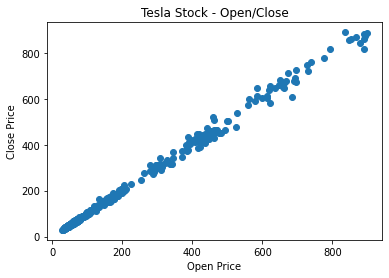

In [30]:
scatter_plot(tesla) ##Clear linear relationship between Open/Close price thus we can use a linear regression model

Linear Regression Model

In [31]:
from sklearn import linear_model

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
reg= linear_model.LinearRegression()

In [34]:
y = tesla["close"]
X = tesla[["open"]]

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1007, 1)
(1007,)
(252, 1)
(252,)


In [36]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print (reg.coef_)

[0.99828869]


In [38]:
y_pred= reg.predict(x_test)
print (y_pred.shape)

(252,)


In [39]:
y_pred

array([422.26795694,  42.50196888, 461.31102755,  57.4862821 ,
        75.98157663, 450.60438137,  79.43365892,  42.75852908,
        68.87875261,  55.88802191, 434.86636019,  62.71531825,
        44.95077104,  61.0072463 ,  75.7819189 ,  59.72614243,
        46.10479276,  73.40100037,  44.36178071,  64.5911027 ,
        62.35393774,  68.89372694,  65.23699548,  77.64672217,
        43.39743384,  57.82270539, 107.33782434, 407.59311322,
        70.76052679,  64.43137651,  47.73000675,  52.51180956,
        60.02193537,  65.4995454 ,  40.21089634,  73.00667634,
        64.33154764,  49.94620763,  66.78334466,  70.79846176,
        76.0814055 , 152.64016503,  51.09224305,  88.36035637,
        38.06856882, 440.32699932,  46.8245589 ,  49.42709752,
        68.36962538,  78.164834  ,  49.15256813,  51.43365778,
       435.4653334 ,  52.0675711 ,  72.48756622,  38.34908794,
        51.5734182 ,  44.73514068,  45.54674938,  69.90199852,
       651.04577571,  97.21517704,  53.47615644,  50.48